In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
## Loading the csv file
shr_bikes = pd.read_csv(r'C:\Users\priya\Documents\Linear Regression Assignment\day.csv')

In [3]:
## Checking the file
shr_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
shr_bikes.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [5]:
## converting weathersit to categorical variable
shr_bikes.weathersit = shr_bikes.weathersit.map({1:'Clear/Clouds', 2:'Mist/Clouds', 3:'Light Snow/Rain', 4:'Heavy Rain/Snow/Fog'})
## converting season to categorical variable
shr_bikes.season = shr_bikes.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
## converting mnth to categorical variable
shr_bikes.mnth = shr_bikes.mnth.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})


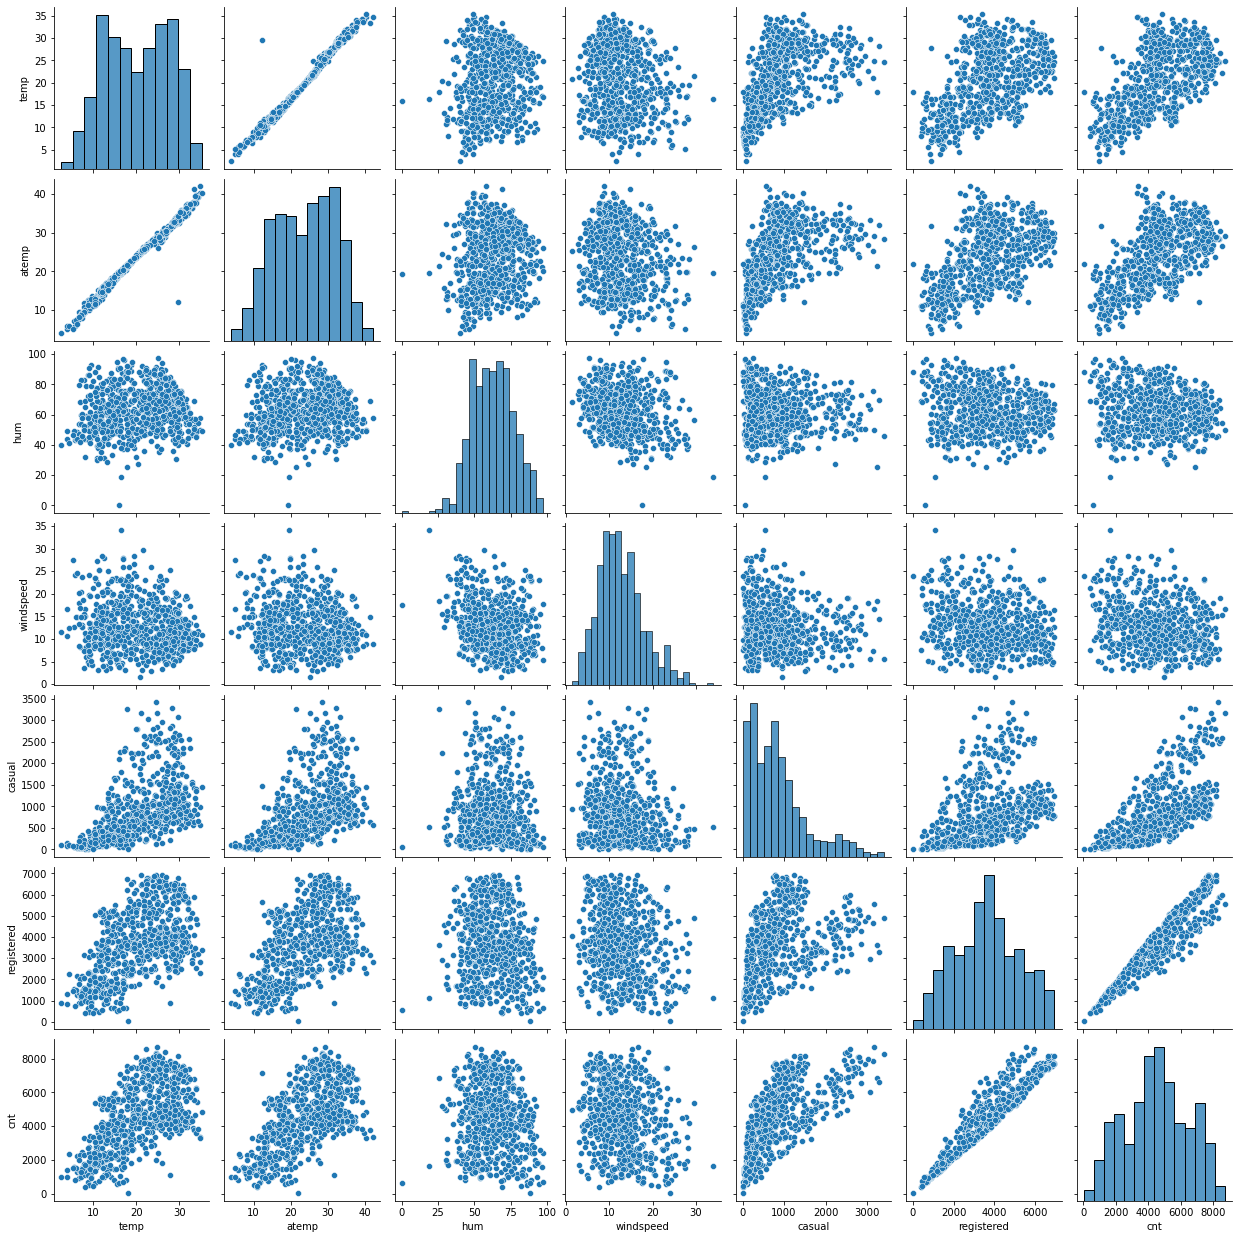

In [6]:
## Numeric data
sns.pairplot(shr_bikes[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered','cnt']])
plt.show()

### we can find below inference from above pairplot
- Registered is highly correlated to cnt
- atemp and temp are next highly correlared to cnt

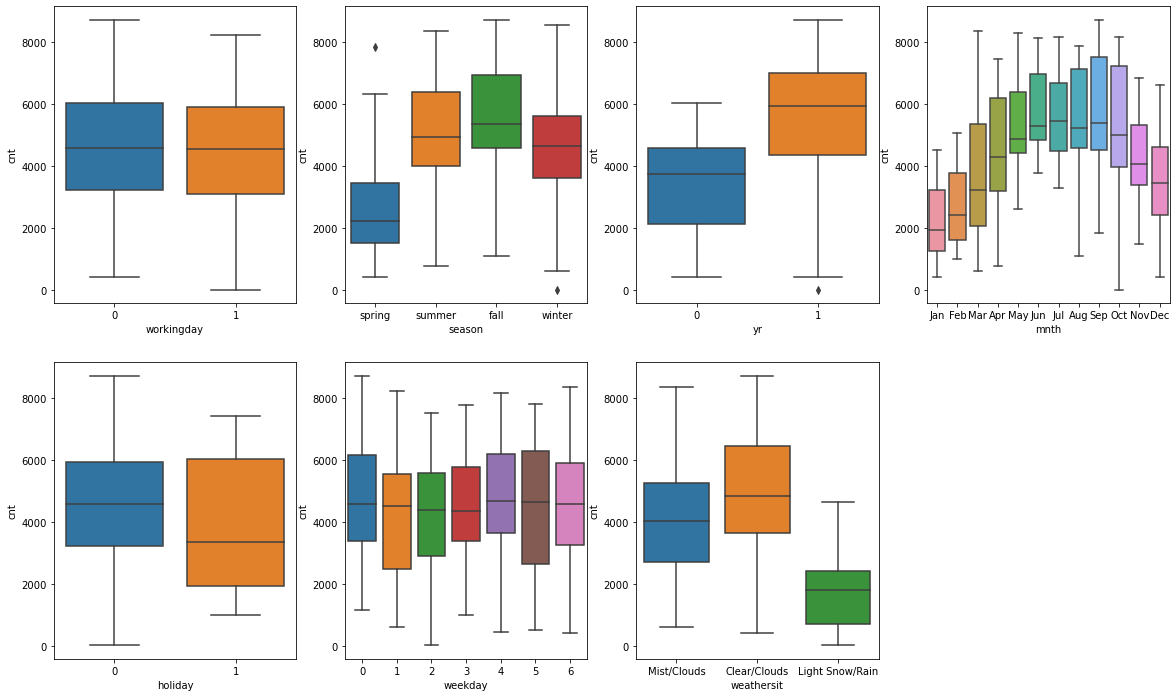

In [7]:
## Visualizing categorical data

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'workingday', y = 'cnt', data = shr_bikes)
plt.subplot(2,4,2)
sns.boxplot(x = 'season', y = 'cnt', data = shr_bikes)
plt.subplot(2,4,3)
sns.boxplot(x = 'yr', y = 'cnt', data = shr_bikes)
plt.subplot(2,4,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = shr_bikes)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = shr_bikes)
plt.subplot(2,4,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = shr_bikes)
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = shr_bikes)
plt.show()

### Below inference can be drawn from above boxplots
- No difference of the demand on weekday/weekend
- fall has highest demand whereas spring has least demand
- demand has increased drastically in 2019 as compared to 2018
- Aug/Sep/Oct months have high demands which is inline with fall season
- when the weathersit is light snow and rain the demand is less
- on holodays, the 25th and 50th quartile has less demands as compared to non-holidays

## Creating dummy Variables

In [8]:
# Let's drop the first column from status df using 'drop_first = True'
status = pd.get_dummies(shr_bikes['season'],drop_first=True)

# Add the results to the original shr_bikes dataframe
shr_bikes = pd.concat([shr_bikes, status], axis = 1)

# Drop 'season' as we have created the dummies for it
shr_bikes.drop(['season'], axis = 1, inplace = True)

In [9]:
# Let's drop the first column from status df using 'drop_first = True'
status = pd.get_dummies(shr_bikes['weathersit'])

# Add the results to the original shr_bikes dataframe
shr_bikes = pd.concat([shr_bikes, status], axis = 1)

# Drop 'season' as we have created the dummies for it
shr_bikes.drop(['weathersit'], axis = 1, inplace = True)

In [10]:
# Let's drop the first column from status df using 'drop_first = True'
status = pd.get_dummies(shr_bikes['mnth'],drop_first = True)

# Add the results to the original shr_bikes dataframe
shr_bikes = pd.concat([shr_bikes, status], axis = 1)

# Drop 'season' as we have created the dummies for it
shr_bikes.drop(['mnth'], axis = 1, inplace = True)

In [11]:
shr_bikes.head()

,instant,dteday,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1,01-01-2018,0,0,1,1,14.110847,18.18125,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,0
1,2,02-01-2018,0,0,2,1,14.902598,17.68695,69.6087,16.652113,...,0,0,1,0,0,0,0,0,0,0
2,3,03-01-2018,0,0,3,1,8.050924,9.47025,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,4,04-01-2018,0,0,4,1,8.200000,10.60610,59.0435,10.739832,...,0,0,1,0,0,0,0,0,0,0
4,5,05-01-2018,0,0,5,1,9.305237,11.46350,43.6957,12.522300,...,0,0,1,0,0,0,0,0,0,0


In [12]:
## SPlitting data into training and testing sets
df_train, df_test = train_test_split(shr_bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

In [13]:
## Rescaling the features using MinMaxScaler
scaler = MinMaxScaler()

num_vars = ['weekday','temp', 'atemp', 'hum', 'windspeed','cnt','casual','registered']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,instant,dteday,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
653,654,16-10-2019,1,0,0.500000,1,0.509887,0.501133,0.575354,0.300794,...,0,0,0,0,0,0,0,0,1,0
576,577,31-07-2019,1,0,0.500000,1,0.815169,0.766351,0.725633,0.264686,...,0,0,0,1,0,0,0,0,0,0
426,427,03-03-2019,1,0,0.000000,0,0.442393,0.438975,0.640189,0.255342,...,0,0,0,0,0,1,0,0,0,0
728,729,30-12-2019,1,0,0.166667,1,0.245101,0.200348,0.498067,0.663106,...,1,0,0,0,0,0,0,0,0,0
482,483,28-04-2019,1,0,0.000000,0,0.395666,0.391735,0.504508,0.188475,...,0,0,0,0,0,0,0,0,0,0


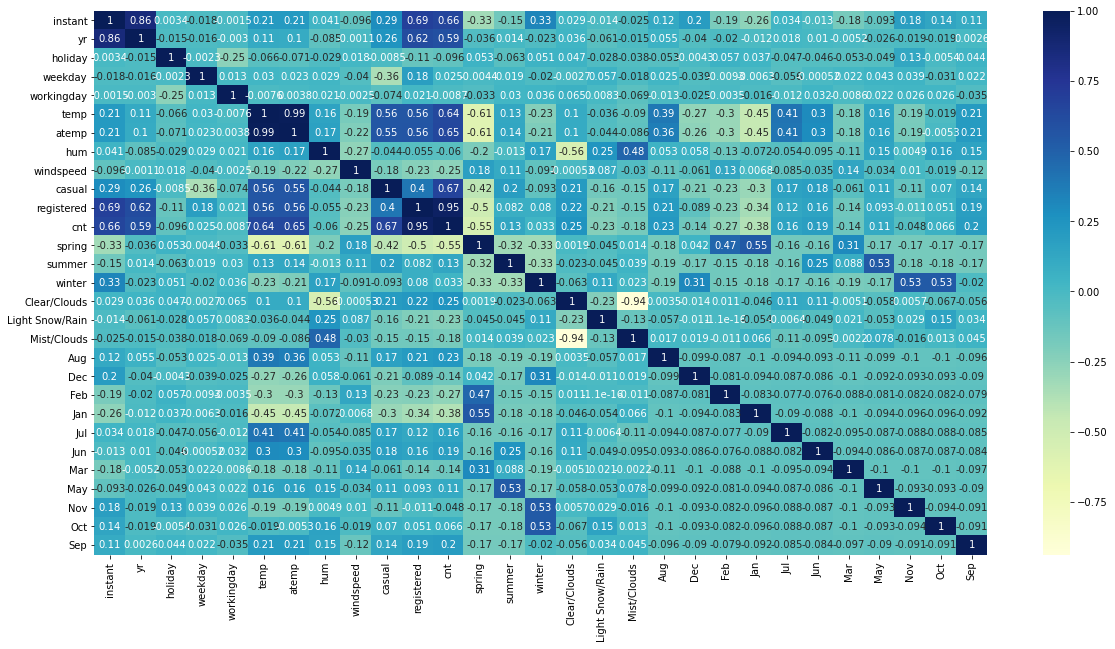

In [14]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [15]:
## Dropping fields which are not required
df_train.drop(['instant','dteday','casual','registered'], axis=1, inplace=True)

## RFE process

In [16]:
## Dividing X and Y sets for model building
y_train = df_train.pop('cnt')
X_train = df_train

In [17]:
# Running RFE with the output number of the variable equal to 10
X_train_rfe = X_train.copy(deep=True)
lmrfe = LinearRegression()
lmrfe.fit(X_train_rfe, y_train)

rfe = RFE(lmrfe, 15)             # running RFE
rfe = rfe.fit(X_train_rfe, y_train)

In [18]:
list(zip(X_train_rfe.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('weekday', False, 8),
 ('workingday', False, 6),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Clear/Clouds', True, 1),
 ('Light Snow/Rain', True, 1),
 ('Mist/Clouds', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 2),
 ('Feb', False, 3),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 11),
 ('Mar', False, 10),
 ('May', False, 4),
 ('Nov', True, 1),
 ('Oct', False, 9),
 ('Sep', True, 1)]

In [19]:
col = X_train_rfe.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Clear/Clouds', 'Light Snow/Rain', 'Mist/Clouds', 'Jan',
       'Jul', 'Nov', 'Sep'],
      dtype='object')

In [20]:
X_train_rfe.columns[~rfe.support_]

Index(['weekday', 'workingday', 'atemp', 'Aug', 'Dec', 'Feb', 'Jun', 'Mar',
       'May', 'Oct'],
      dtype='object')

## Model Building

In [21]:
# Creating X_train_rfe_new dataframe with RFE selected variables
X_train_rfe_new = X_train_rfe[col]
X_train_rfe_new = sm.add_constant(X_train_rfe_new)
lm = sm.OLS(y_train,X_train_rfe_new).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.4
Date:                Sat, 03 Jul 2021   Prob (F-statistic):          2.25e-189
Time:                        17:20:05   Log-Likelihood:                 512.39
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     495   BIC:                            -931.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1533      0.029     

In [22]:
## dropping Nov as it has p-value .144 which is more then .05, and rebuilding the model 

# Creating X_test dataframe with RFE selected variables
X_train_rfe_new_cols = X_train_rfe_new.drop('Nov', axis=1)
X_train_rfe_new_cols = sm.add_constant(X_train_rfe_new_cols)
lm = sm.OLS(y_train,X_train_rfe_new_cols).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.5
Date:                Sat, 03 Jul 2021   Prob (F-statistic):          4.45e-190
Time:                        17:20:05   Log-Likelihood:                 511.29
No. Observations:                 510   AIC:                            -994.6
Df Residuals:                     496   BIC:                            -935.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1481      0.029     

In [23]:
# Check for the VIF values of the feature variables. 
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_new_cols.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_new_cols.values, i) for i in range(X_train_rfe_new_cols.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Clear/Clouds,inf
10,Light Snow/Rain,inf
11,Mist/Clouds,inf
6,spring,5.08
3,temp,3.89
8,winter,3.60
7,summer,2.64
4,hum,1.91
12,Jan,1.57
13,Jul,1.49


In [24]:
## dropping Clear/Clouds as it has inf VIF, rebuilding the model

# Creating X_test dataframe with RFE selected variables
X_train_rfe_new_cols = X_train_rfe_new_cols.drop('Clear/Clouds', axis=1)
X_train_rfe_new_cols = sm.add_constant(X_train_rfe_new_cols)
lm = sm.OLS(y_train,X_train_rfe_new_cols).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.5
Date:                Sat, 03 Jul 2021   Prob (F-statistic):          4.45e-190
Time:                        17:20:05   Log-Likelihood:                 511.29
No. Observations:                 510   AIC:                            -994.6
Df Residuals:                     496   BIC:                            -935.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2957      0.035     

In [25]:
# Check for the VIF values of the feature variables. 
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_new_cols.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_new_cols.values, i) for i in range(X_train_rfe_new_cols.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,76.77
6,spring,5.08
3,temp,3.89
8,winter,3.60
7,summer,2.64
4,hum,1.91
11,Jan,1.57
10,Mist/Clouds,1.56
12,Jul,1.49
13,Sep,1.30


In [26]:
## dropping Jan as it has p-value 0.061, and rebuilding the model

# Creating X_test dataframe with RFE selected variables
X_train_rfe_new_cols = X_train_rfe_new_cols.drop('Jan', axis=1)
X_train_rfe_new_cols = sm.add_constant(X_train_rfe_new_cols)
lm = sm.OLS(y_train,X_train_rfe_new_cols).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Sat, 03 Jul 2021   Prob (F-statistic):          1.69e-190
Time:                        17:20:05   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2841      0.034     

In [27]:
# Check for the VIF values of the feature variables. 
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_new_cols.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_new_cols.values, i) for i in range(X_train_rfe_new_cols.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,74.38
6,spring,5.02
3,temp,3.61
8,winter,3.49
7,summer,2.61
4,hum,1.90
10,Mist/Clouds,1.56
11,Jul,1.48
12,Sep,1.30
9,Light Snow/Rain,1.24


In [28]:
## dropping spring as its VIF is more than 0.05 and rebuilding the model

# Creating X_test dataframe with RFE selected variables
X_train_rfe_new_cols = X_train_rfe_new_cols.drop('spring', axis=1)
X_train_rfe_new_cols = sm.add_constant(X_train_rfe_new_cols)
lm = sm.OLS(y_train,X_train_rfe_new_cols).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     237.6
Date:                Sat, 03 Jul 2021   Prob (F-statistic):          3.89e-190
Time:                        17:20:05   Log-Likelihood:                 505.78
No. Observations:                 510   AIC:                            -987.6
Df Residuals:                     498   BIC:                            -936.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2257      0.027     

In [29]:
# Check for the VIF values of the feature variables. 
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_new_cols.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_new_cols.values, i) for i in range(X_train_rfe_new_cols.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,44.99
4,hum,1.87
3,temp,1.60
9,Mist/Clouds,1.55
10,Jul,1.43
6,summer,1.33
7,winter,1.29
8,Light Snow/Rain,1.24
11,Sep,1.19
5,windspeed,1.18


In [30]:
## dropping summer to bring the total number of features under 10 and rebuilding the model

# Creating X_test dataframe with RFE selected variables
X_train_rfe_new_cols = X_train_rfe_new_cols.drop('summer', axis=1)
X_train_rfe_new_cols = sm.add_constant(X_train_rfe_new_cols)
lm = sm.OLS(y_train,X_train_rfe_new_cols).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     230.6
Date:                Sat, 03 Jul 2021   Prob (F-statistic):          6.36e-180
Time:                        17:20:05   Log-Likelihood:                 478.78
No. Observations:                 510   AIC:                            -935.6
Df Residuals:                     499   BIC:                            -889.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2272      0.028     

In [31]:
## dropping Mist/Clouds to bring the model under 10 and rebuilding the model

# Creating X_test dataframe with RFE selected variables
X_train_rfe_new_cols = X_train_rfe_new_cols.drop('Mist/Clouds', axis=1)
X_train_rfe_new_cols = sm.add_constant(X_train_rfe_new_cols)
lm = sm.OLS(y_train,X_train_rfe_new_cols).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     244.7
Date:                Sat, 03 Jul 2021   Prob (F-statistic):          7.01e-177
Time:                        17:20:05   Log-Likelihood:                 468.75
No. Observations:                 510   AIC:                            -917.5
Df Residuals:                     500   BIC:                            -875.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2687      0.027     

## Residual Analysis

Text(0.5, 0, 'Errors')

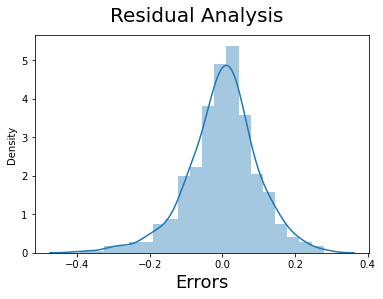

In [32]:
y_train_cnt = lm.predict(X_train_rfe_new_cols)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Residual Analysis', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

### above residual analysis plot shows the normal distribution of the error terms

## Making Prediction on Test data set

In [33]:
df_test_rfe = df_test.copy(deep=True)

## Applying scaling on the test sets
num_vars = ['weekday','temp', 'atemp', 'hum', 'windspeed','cnt','casual','registered']
df_test_rfe[num_vars] = scaler.transform(df_test_rfe[num_vars])


## Dropping fields that are not required
df_test_rfe.drop(['instant','dteday','casual','registered'], axis=1, inplace=True)

In [34]:
## Dividing X_test and y_test

y_test = df_test_rfe.pop('cnt')
X_test = df_test_rfe

In [35]:
# Now let's use our model to make predictions.
X_train_new = X_train_rfe_new_cols.drop('const', axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [36]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation on Test data set

Text(0, 0.5, 'y_pred')

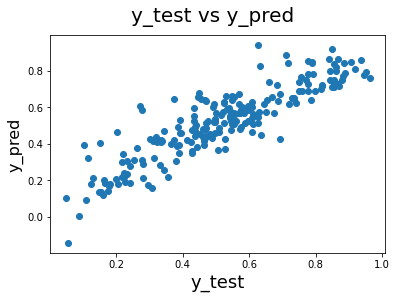

In [37]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Text(0.5, 0, 'Errors')

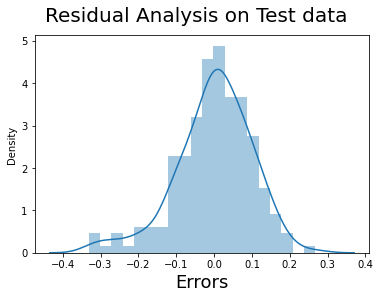

In [38]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_pred), bins = 20)
fig.suptitle('Residual Analysis on Test data', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

#### Above plot shows normal distribution of the error terms

### R2 of the test data set

In [39]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.7878139306433101

### Adjusted R2 of the test data set

In [40]:
N= 219
P= 9
adj_r2 = 1 - ((1-r2)*(N-1)/(N-P-1))
adj_r2

0.7786767314844095

Text(0, 0.5, 'ytest-ypred')

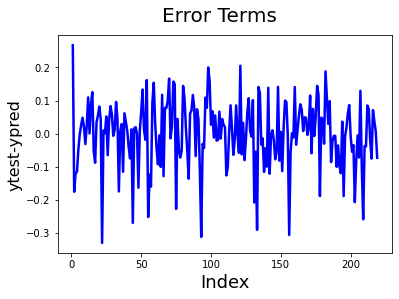

In [41]:
# Error terms
c = [i for i in range(1,220,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20) 
plt.xlabel('Index', fontsize=18) 
plt.ylabel('ytest-ypred', fontsize=16)

#### Above plot shows independence of error terms

Text(0, 0.5, 'ytest-ypred')

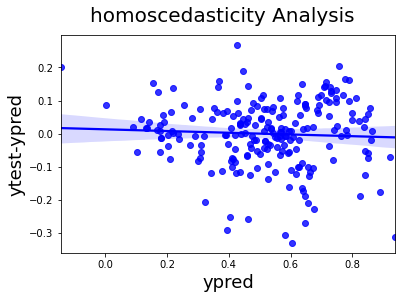

In [42]:
## homescedasticity of error terms
fig = plt.figure()
sns.regplot(y_pred,y_test-y_pred, color="blue")
fig.suptitle('homoscedasticity Analysis', fontsize = 20)                  # Plot heading 
plt.xlabel('ypred', fontsize = 18) 
plt.ylabel('ytest-ypred', fontsize=18)